# Cleaning & Exploration of German Ebay Car Sales Data
The dataset includes: <br>
* dateCrawled - When this ad was first crawled. All field-values are taken from this date.
* name - Name of the car.
* seller - Whether the seller is private or a dealer.
* offerType - The type of listing
* price - The price on the ad to sell the car.
* abtest - Whether the listing is included in an A/B test.
* vehicleType - The vehicle Type.
* yearOfRegistration - The year in which which year the car was first registered.
* gearbox - The transmission type.
* powerPS - The power of the car in PS.
* model - The car model name.
* kilometer - How many kilometers the car has driven.
* monthOfRegistration - The month in which which year the car was first registered.
* fuelType - What type of fuel the car uses.
* brand - The brand of the car.
* notRepairedDamage - If the car has a damage which is not yet repaired.
* dateCreated - The date on which the eBay listing was created.
* nrOfPictures - The number of pictures in the ad.
* postalCode - The postal code for the location of the vehicle.
* lastSeenOnline - When the crawler saw this ad last online.


In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
autos = pd.read_csv("Ebay_autos.csv")
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,3/26/2016 17:47,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,3/26/2016 0:00,0,79588,4/6/2016 6:45
1,4/4/2016 13:38,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,4/4/2016 0:00,0,71034,4/6/2016 14:45
2,3/26/2016 18:57,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,3/26/2016 0:00,0,35394,4/6/2016 20:15
3,3/12/2016 16:58,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,3/12/2016 0:00,0,33729,3/15/2016 3:16
4,4/1/2016 14:38,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,4/1/2016 0:00,0,39218,4/1/2016 14:38


**Drop Unnecessary Columns & Clean Columns** <br>
*Some columns are not useful and should be removed <br>
*convert the columns names from camelcase to python preferred snake_case

In [3]:
# drop unneccesary columns
autos = autos.drop(['name','seller','offerType','abtest','powerPS','model','fuelType','nrOfPictures','postalCode'],axis=1)

In [57]:
# renaming the columns
autos.columns = ['date_crawled','price','vehicle_type','registration_year','gearbox','odometer','registration_month','brand','unrepaired_damage','date_created','last_seen']
autos.head()

,date_crawled,price,vehicle_type,registration_year,gearbox,odometer,registration_month,brand,unrepaired_damage,date_created,last_seen
0,3/26/2016 17:47,5000,bus,2004,manuell,150000,3,peugeot,nein,3/26/2016 0:00,4/6/2016 6:45
1,4/4/2016 13:38,8500,limousine,1997,automatik,150000,6,bmw,nein,4/4/2016 0:00,4/6/2016 14:45
2,3/26/2016 18:57,8990,limousine,2009,manuell,70000,7,volkswagen,nein,3/26/2016 0:00,4/6/2016 20:15
3,3/12/2016 16:58,4350,kleinwagen,2007,automatik,70000,6,smart,nein,3/12/2016 0:00,3/15/2016 3:16
4,4/1/2016 14:38,1350,kombi,2003,manuell,150000,7,ford,nein,4/1/2016 0:00,4/1/2016 14:38


**Clean the Registration Column** 
 * This column has some inaccurate values for instance year 1000,1001 etc that need to be removed
 * The years between 1900 and 2016 seems to be realistic


In [5]:
# clean the registration column
autos = autos[autos['registration_year'].between(1900,2016)]
autos['registration_year'].value_counts().head(10)

2000    3354
2005    3015
1999    3000
2004    2737
2003    2727
2006    2708
2001    2703
2002    2533
1998    2453
2007    2304
Name: registration_year, dtype: int64

* Most of the registration occurred between the years 1998 and 2007 

**Clean the Price Column**
* The $ and comma need to be removed
* Price suddenly jumped from 350k to 999k, this column has outliers that need to be removed

In [6]:
# remove $ and comma from price column
autos.price = ((autos.price.apply(lambda x: x.strip('$')).apply(lambda x: x.replace(',','')))).astype(int)
autos.price.head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int32

In [7]:
# display the first 20 values of price column in ascending order
autos['price'].value_counts().sort_index(ascending=False).head(20)


99999999    1
27322222    1
12345678    1
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64

*As shown above, price drastically changed from 350000 to 999990, and the prices aftrwards appear to be random. Hence, it is logical to consider prices above 350000 to be outliers and be removed from the column.

In [61]:
#describe the cleaned price column
autos = autos[autos['price'].between(1,350000)]
autos.describe()

,price,registration_year,odometer,registration_month
count,46681.000000,46681.000000,46681.000000,46681.000000
mean,5977.716801,2002.910756,125586.855466,5.827125
std,9177.909479,7.185103,39852.528628,3.670300
min,1.000000,1910.000000,5000.000000,0.000000
25%,1250.000000,1999.000000,100000.000000,3.000000
50%,3100.000000,2003.000000,150000.000000,6.000000
75%,7500.000000,2008.000000,150000.000000,9.000000
max,350000.000000,2016.000000,150000.000000,12.000000


In [9]:
#clean odometer column
autos["odometer"] = (autos["odometer"].str.replace("km","").str.replace(",", "").astype(int))
autos.odometer.head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer, dtype: int32

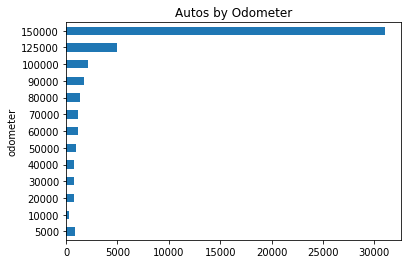

In [10]:
autos.groupby('odometer').odometer.size().plot(kind='barh', title='Autos by Odometer')
plt.show()

*It is obvious from the graph above that cars listed on the German Ebay had mileage between 5000 and 150000. Though, the vast majority of listed cars had mileage greater than 125000

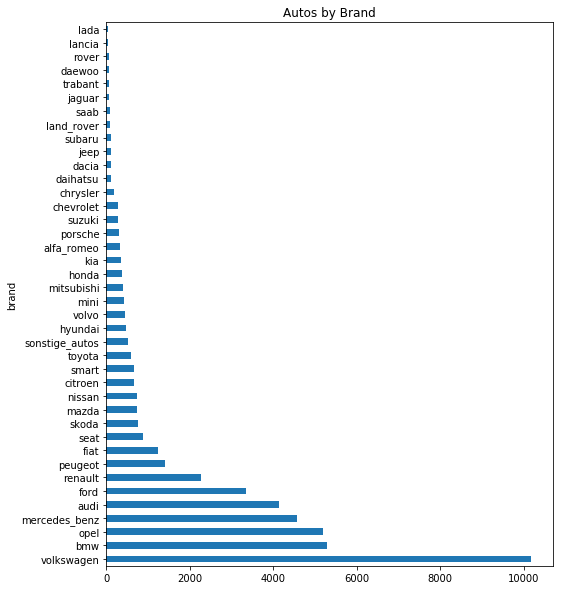

In [51]:
#auto by brand
auto_brand = autos.groupby('brand').brand.size() 
auto_brand.sort_values(ascending=False).plot(kind='barh',figsize=(8,10),title='Autos by Brand')
                                        

* The most popular,which are also german brands are volkswagen,bmw,opel,mercedes_benz and audi

In [82]:
autos.groupby('brand').apply(lambda x: x.price.mean())


brand
alfa_romeo         4087.690323
audi               9336.687454
bmw                8332.820518
chevrolet          6684.139098
chrysler           3465.743902
citroen            3779.139144
dacia              5915.528455
daewoo             1049.000000
daihatsu           1636.196581
fiat               2813.748538
ford               3749.469507
honda              4107.857923
hyundai            5365.254274
jaguar            11635.493151
jeep              11650.500000
kia                5982.330303
lada               2688.296296
lancia             3376.220000
land_rover        19108.091837
mazda              4112.596615
mercedes_benz      8628.450366
mini              10613.459658
mitsubishi         3394.572917
nissan             4743.402525
opel               2975.241935
peugeot            3094.017229
porsche           45643.937063
renault            2474.864607
rover              1602.290323
saab               3211.649351
seat               4397.230950
skoda              6368.000000
sm

In [85]:
autos.groupby('odometer').apply(lambda x: x.price.mean())

odometer
5000       8873.515924
10000     20550.867220
20000     18448.477089
30000     16608.836842
40000     15499.568381
50000     13812.173212
60000     12385.004433
70000     10927.182814
80000      9721.947636
90000      8465.025105
100000     8132.697279
125000     6214.022030
150000     3767.927107
dtype: float64

* Average prices do not seem to follow a regular pattern based on the mileage. This is because other factors aside from mileage contribute to the value of a car.

In [91]:
# Average price of damaged & undamaged autos
autos.replace(['ja','nein'],['Yes','No']).groupby('unrepaired_damage').apply(lambda x: x.price.mean())

unrepaired_damage
No     7164.033103
Yes    2241.146035
dtype: float64

* The average price of cars without damage was approximately 7164 while for damaged cars was approximately 2241 